# **Text Analytics & Text Mining**
*Text Analytics* merupakan pendekatan dengan metodologi untuk mengekstrak pengetahuan dari data teks. Digunakan untuk kepentingan bisnis dan pengambilan keputusan lainnya.
> 
Sedangkan *Text Mining* merupakan alat yang digunakan pada *Text Analytics*.


## **Text Mining**
*Text Mining* merupakan proses melihat pola dan insight baru yang berasal dari banyaknya data yang pada awalnya tidak terstruktur (*unstructured data*). Pengolahan *Text Mining* membutuhkan proses yang dinamakan *Pre-Processing Data*.

## **Pre-Processing Data**
*Pre-Processing Data* merupakan proses untuk mempersiapkan data mentah (*raw data*) sebelum dilakukannya proses lain. Pada umunya, *pre-processing data* dilakukan dengan cara mengeliminasi data yang tidak sesuai atau mengubah data menjadi bentuk yang lebih mudah diproses oleh sistem.

Selain itu, praktikum kali ini akan membahas metode dalam *text mining* yaitu **Sentiment Analysis** dan **Topic Modelling**


1.   **Sentiment Analysis**

> Sentiment Analysis merupakan proses memahami dan mengelompokkan emosi (positif, negatif, dan netral) yang terdapat dalam tulisan menggunakan teknik Text Analytics. Data emosi tersebut dapat menjelaskan opini masyarakat mengenai produk, merek, layanan, politik, atau topik lainnya. Perusahaan, pemerintah, maupun bidang lainnya kemudian memanfaatkan data-data tersebut untuk membuat analisis pemasaran, review produk, umpan-balik produk, dan layanan masyarakat.

2.   **Topic Modelling**

> Topic Modelling merupakan pengelompokkan data teks berdasarkan suatu topik tertentu. Topic Modelling memiliki tujuan yang sama dengan classification tetapi menggunakan pendekatan berbeda. Topic Modelling tidak membutuhkan data berlabel (unsupervised learning) dan bekerja seperti clustering karena mengelompokkan data teks berdasarkan kemiripannya.








Praktikum kali ini menggunakan data tweet terkait Digital Currency sepanjang tahun 2020.

###**1. Install and Load Packages**

- packages tweet-preprocessor: memudahkan untuk membersihkan, mengurai, atau memberi token pada tweet.
- packages pyLDAvis: LDA (Latent Dirichlet Allocation) membantu dalam metode *Topic Modelling*

In [1]:
# Install packages
! pip install tweet-preprocessor
! pip install pyLDAvis

     |████████████████████████████████| 1.7 MB 15.3 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 15.7 MB 43.9 MB/s 
     |████████████████████████████████| 11.3 MB 52.0 MB/s 
  Created wheel for pyLDAvis: filename=pyLDAvis-3.3.1-py2.py3-none-any.whl size=136897 sha256=1369f4d07eacb9bf39f6d6116ea8164ca2e08c84120144a3c35d00052478ba60
  Stored in directory: /root/.cache/pip/wheels/c9/21/f6/17bcf2667e8a68532ba2fbf6d5c72fdf4c7f7d9abfa4852d2f
Successfully built pyLDAvis
  Attempting uninstall: numpy
    Found existing installation: numpy 1.19.5
    Uninstalling numpy-1.19.5:
      Successfully uninstalled numpy-1.19.5
  Attempting uninstall: pandas
    Found existing installation: pandas 1.1.5
    Uninstalling pandas-1.1.5:
      Successfully uninstalled pandas-1.1.5
ERROR: pip's dependency resolver does not currently take i

In [ ]:
# Install pandas versi 1.3.0
  # (untuk mempermudah proses transformasi data)
! pip install pandas==1.3.0

     |████████████████████████████████| 10.8 MB 5.1 MB/s 
  Attempting uninstall: pandas
    Found existing installation: pandas 1.3.4
    Uninstalling pandas-1.3.4:
      Successfully uninstalled pandas-1.3.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires pandas~=1.1.0; python_version >= "3.0", but you have pandas 1.3.0 which is incompatible.


In [ ]:
# Load packages
import pandas as pd
import matplotlib.pyplot as plt
import preprocessor as p
import numpy as np
import networkx as nx
import wordcloud
import nltk
import warnings
import itertools
import re
import os
import random
import pyLDAvis
import pyLDAvis.sklearn 

/usr/local/lib/python3.7/dist-packages/past/types/oldstr.py:5: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Iterable
/usr/local/lib/python3.7/dist-packages/past/builtins/misc.py:4: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Mapping


In [ ]:
# Import module
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud
from wordcloud import STOPWORDS
from nltk.sentiment.vader import SentimentIntensityAnalyzer 
from tqdm import tqdm
from nltk import bigrams
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation

/usr/local/lib/python3.7/dist-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [ ]:
# Set parameter
 # (untuk mengabaikan 'filter warnings')
warnings.filterwarnings('ignore')
pyLDAvis.enable_notebook()

### **2. Import Data**
Dataset Digital Currency yang digunakan berasal dari github, sehingga import data langsung menggunakan link dataset

In [ ]:
# Import data
df = pd.read_csv("https://raw.githubusercontent.com/apriandito/digital-currency/main/data/tweet_digitalcurrency_text-sample.csv")

In [ ]:
# Lihat 5 baris pertama data
df.head()

,created_at,text
0,2020-12-30T19:53:02Z,@LewisECFC @Kes1977 @herotroyippygod @GlobeSen...
1,2020-12-30T21:19:36Z,"@davidmcw Come on David, tell me billionaires ..."
2,2020-12-30T17:57:18Z,@PeterSchiff Chinas digital currency could bri...
3,2020-12-30T16:57:39Z,@ecb @finanzfluss And people still call the NW...
4,2020-12-30T20:40:18Z,"to get 'clarity' finally. Naturally, a company..."


In [ ]:
# Melihat ringkasan singkat dari dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   created_at  731 non-null    object
 1   text        731 non-null    object
dtypes: object(2)
memory usage: 11.5+ KB


### **3. Text Preprocessing**
Proses pengolahan data

In [ ]:
# Pilih kolom 'TEXT' saja
tweet = df[['text']]

# Lihat 5 baris pertama data
tweet.head()

,text
0,@LewisECFC @Kes1977 @herotroyippygod @GlobeSen...
1,"@davidmcw Come on David, tell me billionaires ..."
2,@PeterSchiff Chinas digital currency could bri...
3,@ecb @finanzfluss And people still call the NW...
4,"to get 'clarity' finally. Naturally, a company..."


#### **a. Transformation**
Membersihkan dataset dari URLs, hashtags, mentions, RT & Fav, emoji, smileys, & number menggunakan packages tweet-preprocessor. Dilanjutkan dengan mengubah huruf pada dataset menjadi huruf kecil (lowercase)

In [ ]:
# Membuat fungsi transformasi tweet
 # dilanjutkan dengan mengubah huruf pada dataset menjadi lowercase

def transform_tweet(row):
  tweet = row['text']
  tweet = p.clean(tweet)
  tweet = str.lower(tweet)
  return tweet

In [ ]:
# Mengaplikasikan fungsi transformasi dengan membuat kolom baru di dataset
tweet['transformed'] = tweet.apply(transform_tweet, axis=1)

# Lihat 5 baris pertama data
tweet.head()

# kolom 'text' merupakan teks sebelum diubah
# kolom 'transformed' merupakan teks setelah melalui proses transformasi (cleaning) 

,text,transformed
0,@LewisECFC @Kes1977 @herotroyippygod @GlobeSen...,much easier to implement the changes and laws ...
1,"@davidmcw Come on David, tell me billionaires ...","come on david, tell me billionaires arent sitt..."
2,@PeterSchiff Chinas digital currency could bri...,chinas digital currency could briefly become t...
3,@ecb @finanzfluss And people still call the NW...,and people still call the nwo and one digital ...
4,"to get 'clarity' finally. Naturally, a company...","to get 'clarity' finally. naturally, a company..."


#### **b. Tokenization**
Memotong teks menjadi unit yang lebih kecil yang disebut 'token'

In [ ]:
# Download Punkt
# Punkt merupakan alat 'Tokenizer' yang membagi teks menjadi unit-unit yang lebih kecil
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
# Membuat fungsi tokenization

def tokenize_tweet(row):
    tweet = row['transformed']
    tokens = nltk.word_tokenize(tweet)
    token_words = [w for w in tokens if w.isalpha()]
    return token_words

In [ ]:
# Mengaplikasikan fungsi tokenization dengan membuat kolom baru di dataset
tweet['tokenized'] = tweet.apply(tokenize_tweet, axis=1)

# Lihat 5 baris pertama data
tweet.head()

# kolom 'text' merupakan teks sebelum diubah
# kolom 'transformed' merupakan teks setelah melalui proses transformasi (cleaning)
# kolom 'tokenized' merupakan teks setelah melalui proses tokenization

,text,transformed,tokenized
0,@LewisECFC @Kes1977 @herotroyippygod @GlobeSen...,much easier to implement the changes and laws ...,"[much, easier, to, implement, the, changes, an..."
1,"@davidmcw Come on David, tell me billionaires ...","come on david, tell me billionaires arent sitt...","[come, on, david, tell, me, billionaires, aren..."
2,@PeterSchiff Chinas digital currency could bri...,chinas digital currency could briefly become t...,"[chinas, digital, currency, could, briefly, be..."
3,@ecb @finanzfluss And people still call the NW...,and people still call the nwo and one digital ...,"[and, people, still, call, the, nwo, and, one,..."
4,"to get 'clarity' finally. Naturally, a company...","to get 'clarity' finally. naturally, a company...","[to, get, finally, naturally, a, company, can,..."


#### **c. Stemming**
Mengubah kata menjadi bentuk dasar umum (memotong/stem)

In [ ]:
# Membuat fungsi stemming
def stemming_tweet(row):
    list = row['tokenized']
    stemming_list = [PorterStemmer().stem(w) for w in list]
    return(stemming_list)

In [ ]:
# Mengaplikasikan fungsi stemming dengan membuat kolom baru di dataset
tweet['stemmed'] = tweet.apply(stemming_tweet, axis=1)

# Lihat 5 baris pertama data
tweet.head()

# kolom 'text' merupakan teks sebelum diubah
# kolom 'transformed' merupakan teks setelah melalui proses transformasi (cleaning)
# kolom 'tokenized' merupakan teks setelah melalui proses tokenization
# kolom 'stemmed' merupakan teks setelah melalui proses stemming

,text,transformed,tokenized,stemmed
0,@LewisECFC @Kes1977 @herotroyippygod @GlobeSen...,much easier to implement the changes and laws ...,"[much, easier, to, implement, the, changes, an...","[much, easier, to, implement, the, chang, and,..."
1,"@davidmcw Come on David, tell me billionaires ...","come on david, tell me billionaires arent sitt...","[come, on, david, tell, me, billionaires, aren...","[come, on, david, tell, me, billionair, arent,..."
2,@PeterSchiff Chinas digital currency could bri...,chinas digital currency could briefly become t...,"[chinas, digital, currency, could, briefly, be...","[china, digit, currenc, could, briefli, becom,..."
3,@ecb @finanzfluss And people still call the NW...,and people still call the nwo and one digital ...,"[and, people, still, call, the, nwo, and, one,...","[and, peopl, still, call, the, nwo, and, one, ..."
4,"to get 'clarity' finally. Naturally, a company...","to get 'clarity' finally. naturally, a company...","[to, get, finally, naturally, a, company, can,...","[to, get, final, natur, a, compani, can, not, ..."


#### **d. Lemmatization**
Mengubah kata menjadi bentuk dasar umum menggunakan analisis morfologi. Lemmatization biasanya lebih baik hasilnya dari Stemming. Stemming hanya memotong kata, sedangkan Lemmatization memotong kata dan menggunakan dictionary yang lebih lengkap.

In [ ]:
# Download Wordnet
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [ ]:
# Membuat fungsi lemmatization
def lemmatize_tweet(row):
    list = row['tokenized']
    lemmatize_list = [WordNetLemmatizer().lemmatize(w, pos= 'v') for w in list]
    return(lemmatize_list)

In [ ]:
# Mengaplikasikan fungsi lemmatization dengan membuat kolom baru di dataset
tweet['lemmatized'] = tweet.apply(lemmatize_tweet, axis=1)

# Lihat 5 baris pertama data
tweet.head()

# kolom 'text' merupakan teks sebelum diubah
# kolom 'transformed' merupakan teks setelah melalui proses transformasi (cleaning)
# kolom 'tokenized' merupakan teks setelah melalui proses tokenization
# kolom 'stemmed' merupakan teks setelah melalui proses stemming
# kolom 'lemmatized' merupakan teks setelah melalui proses lemmatization

,text,transformed,tokenized,stemmed,lemmatized
0,@LewisECFC @Kes1977 @herotroyippygod @GlobeSen...,much easier to implement the changes and laws ...,"[much, easier, to, implement, the, changes, an...","[much, easier, to, implement, the, chang, and,...","[much, easier, to, implement, the, change, and..."
1,"@davidmcw Come on David, tell me billionaires ...","come on david, tell me billionaires arent sitt...","[come, on, david, tell, me, billionaires, aren...","[come, on, david, tell, me, billionair, arent,...","[come, on, david, tell, me, billionaires, aren..."
2,@PeterSchiff Chinas digital currency could bri...,chinas digital currency could briefly become t...,"[chinas, digital, currency, could, briefly, be...","[china, digit, currenc, could, briefli, becom,...","[chinas, digital, currency, could, briefly, be..."
3,@ecb @finanzfluss And people still call the NW...,and people still call the nwo and one digital ...,"[and, people, still, call, the, nwo, and, one,...","[and, peopl, still, call, the, nwo, and, one, ...","[and, people, still, call, the, nwo, and, one,..."
4,"to get 'clarity' finally. Naturally, a company...","to get 'clarity' finally. naturally, a company...","[to, get, finally, naturally, a, company, can,...","[to, get, final, natur, a, compani, can, not, ...","[to, get, finally, naturally, a, company, can,..."


#### **e. Stopword Removal**
Menghapus kata yang tidak menambahkan arti pada kalimat.
Contoh:
> 
English: a, about, be, because, being, between, by, can't, do, during, from, have, he, she, him, her, it, is, i'm, you, too, they, this, etc.
> 
Indonesian: ada, agar, apa, nah, pula, pun, itu, dan, wah, yang, atau, dll.




In [ ]:
# Download stopword bahasa inggris
nltk.download('stopwords')
stops = set(stopwords.words("english"))     

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
# Membuat fungsi stopword
def stopword_tweet(row):
    list = row['lemmatized']
    stopword_list = [w for w in list if not w in stops]
    return(stopword_list)

In [ ]:
# Mengaplikasikan fungsi Stopword dengan membuat kolom baru di dataset
tweet['stopword'] = tweet.apply(stopword_tweet, axis=1)

# Lihat 5 baris pertama data
tweet.head()

# kolom 'text' merupakan teks sebelum diubah
# kolom 'transformed' merupakan teks setelah melalui proses transformasi (cleaning)
# kolom 'tokenized' merupakan teks setelah melalui proses tokenization
# kolom 'stemmed' merupakan teks setelah melalui proses stemming
# kolom 'lemmatized' merupakan teks setelah melalui proses lemmatization
# kolom 'stopword' merupakan teks setelah melalui proses stopword removal

,text,transformed,tokenized,stemmed,lemmatized,stopword
0,@LewisECFC @Kes1977 @herotroyippygod @GlobeSen...,much easier to implement the changes and laws ...,"[much, easier, to, implement, the, changes, an...","[much, easier, to, implement, the, chang, and,...","[much, easier, to, implement, the, change, and...","[much, easier, implement, change, laws, theyve..."
1,"@davidmcw Come on David, tell me billionaires ...","come on david, tell me billionaires arent sitt...","[come, on, david, tell, me, billionaires, aren...","[come, on, david, tell, me, billionair, arent,...","[come, on, david, tell, me, billionaires, aren...","[come, david, tell, billionaires, arent, sit, ..."
2,@PeterSchiff Chinas digital currency could bri...,chinas digital currency could briefly become t...,"[chinas, digital, currency, could, briefly, be...","[china, digit, currenc, could, briefli, becom,...","[chinas, digital, currency, could, briefly, be...","[chinas, digital, currency, could, briefly, be..."
3,@ecb @finanzfluss And people still call the NW...,and people still call the nwo and one digital ...,"[and, people, still, call, the, nwo, and, one,...","[and, peopl, still, call, the, nwo, and, one, ...","[and, people, still, call, the, nwo, and, one,...","[people, still, call, nwo, one, digital, curre..."
4,"to get 'clarity' finally. Naturally, a company...","to get 'clarity' finally. naturally, a company...","[to, get, finally, naturally, a, company, can,...","[to, get, final, natur, a, compani, can, not, ...","[to, get, finally, naturally, a, company, can,...","[get, finally, naturally, company, wait, seven..."


#### **f. Rejoin Token**
Menggabungkan token / kata-kata yang telah sampai proses stopword menjadi kalimat utuh.

In [ ]:
# Membuat fungsi rejoin untuk mengembalikan sebagai kalimat utuh
def rejoin_tweet(row):
    list = row['stopword']
    joined_words = ( " ".join(list))
    return joined_words

In [ ]:
# Mengaplikasikan fungsi rejoin dengan membuat kolom baru di dataset
tweet['final'] = tweet.apply(rejoin_tweet, axis=1)

# Lihat 5 baris pertama data
tweet.head()

# kolom 'text' merupakan teks sebelum diubah
# kolom 'transformed' merupakan teks setelah melalui proses transformasi (cleaning)
# kolom 'tokenized' merupakan teks setelah melalui proses tokenization
# kolom 'stemmed' merupakan teks setelah melalui proses stemming
# kolom 'lemmatized' merupakan teks setelah melalui proses lemmatization
# kolom 'stopword' merupakan teks setelah melalui proses stopword removal
# kolom 'final' merupakan teks setelah melalui proses rejoin token

,text,transformed,tokenized,stemmed,lemmatized,stopword,final
0,@LewisECFC @Kes1977 @herotroyippygod @GlobeSen...,much easier to implement the changes and laws ...,"[much, easier, to, implement, the, changes, an...","[much, easier, to, implement, the, chang, and,...","[much, easier, to, implement, the, change, and...","[much, easier, implement, change, laws, theyve...",much easier implement change laws theyve want ...
1,"@davidmcw Come on David, tell me billionaires ...","come on david, tell me billionaires arent sitt...","[come, on, david, tell, me, billionaires, aren...","[come, on, david, tell, me, billionair, arent,...","[come, on, david, tell, me, billionaires, aren...","[come, david, tell, billionaires, arent, sit, ...",come david tell billionaires arent sit hot tub...
2,@PeterSchiff Chinas digital currency could bri...,chinas digital currency could briefly become t...,"[chinas, digital, currency, could, briefly, be...","[china, digit, currenc, could, briefli, becom,...","[chinas, digital, currency, could, briefly, be...","[chinas, digital, currency, could, briefly, be...",chinas digital currency could briefly become w...
3,@ecb @finanzfluss And people still call the NW...,and people still call the nwo and one digital ...,"[and, people, still, call, the, nwo, and, one,...","[and, peopl, still, call, the, nwo, and, one, ...","[and, people, still, call, the, nwo, and, one,...","[people, still, call, nwo, one, digital, curre...",people still call nwo one digital currency con...
4,"to get 'clarity' finally. Naturally, a company...","to get 'clarity' finally. naturally, a company...","[to, get, finally, naturally, a, company, can,...","[to, get, final, natur, a, compani, can, not, ...","[to, get, finally, naturally, a, company, can,...","[get, finally, naturally, company, wait, seven...",get finally naturally company wait seven years...


In [ ]:
# Final tweet yang sudah di proses
 # mengubah nama kolom "final" menjadi "text" untuk ditampilkan dengan variabel tweet_clean

tweet_clean = tweet[['final']]
tweet_clean = tweet_clean.rename(columns={'final': 'text'})

# Lihat 5 baris pertama data
tweet_clean.head()

,text
0,much easier implement change laws theyve want ...
1,come david tell billionaires arent sit hot tub...
2,chinas digital currency could briefly become w...
3,people still call nwo one digital currency con...
4,get finally naturally company wait seven years...


### **4. WordCloud**
WordCloud merupakan bagian dari Content Description untuk melihat kemunculan dari kata-kata. Kata yang ukurannya paling besar yang muncul merupakan kata yang paling banyak kuantitasnya dalam dataset.

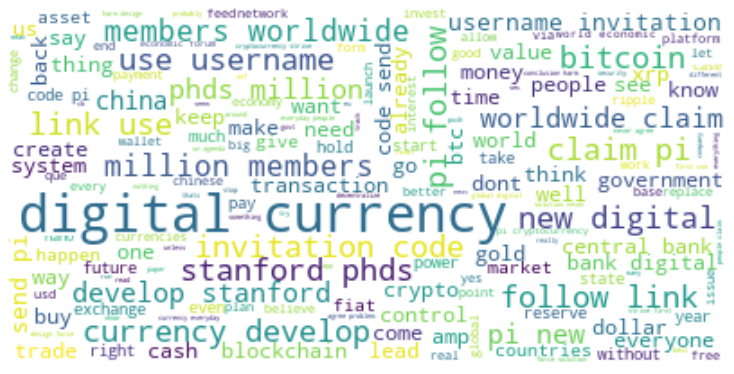

In [ ]:
# Visualisasi Word Cloud
text_wordcloud = " ".join(tweet for tweet in tweet_clean.text)

cloud = WordCloud(background_color='white').generate(text_wordcloud)

plt.figure(figsize=(10, 10), facecolor=None)
plt.imshow(cloud, interpolation="bilinear")
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

### **5. Sentiment Analysis**

In [ ]:
# Download corpus untuk sentiment analysis
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [ ]:
# Sentiment Analysis
sid = SentimentIntensityAnalyzer()
listy = [] 
for index, row in tweet_clean.iterrows():
  ss = sid.polarity_scores(row['text'])
  listy.append(ss)
  
se = pd.Series(listy)
tweet_clean['polarity'] = se.values
display(tweet_clean.head(5))

,text,polarity
0,much easier implement change laws theyve want ...,"{'neg': 0.0, 'neu': 0.673, 'pos': 0.327, 'comp..."
1,come david tell billionaires arent sit hot tub...,"{'neg': 0.0, 'neu': 0.736, 'pos': 0.264, 'comp..."
2,chinas digital currency could briefly become w...,"{'neg': 0.199, 'neu': 0.623, 'pos': 0.178, 'co..."
3,people still call nwo one digital currency con...,"{'neg': 0.327, 'neu': 0.673, 'pos': 0.0, 'comp..."
4,get finally naturally company wait seven years...,"{'neg': 0.091, 'neu': 0.909, 'pos': 0.0, 'comp..."


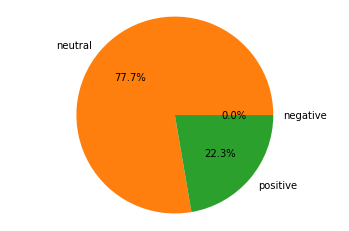

In [ ]:
# Visualisasi Pie Chart
labels = ['negative', 'neutral', 'positive']
sizes  = [ss['neg'], ss['neu'], ss['pos']]
plt.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.axis('equal') 
plt.show()

### **6. Topic Modelling**

In [ ]:
# clone tambahan library dari github
! git clone https://github.com/machine-learning-ss/tm

# Set Data Directory
os.chdir('tm')

Cloning into 'tm'...
remote: Enumerating objects: 7, done.
remote: Counting objects: 100% (7/7), done.
remote: Compressing objects: 100% (5/5), done.
remote: Total 7 (delta 0), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (7/7), done.


In [ ]:
# Melihat total loaded tweets

import MyLib as TS

Tweets = tweet_clean['text']
print('Total loaded tweets = {0}'.format(len(Tweets)))

Total loaded tweets = 731


In [ ]:
# Menentukan banyaknya jumlah topik dan kata-kata yang akan diambil
n_topics = 4
top_topics = 4
top_words = 10

In [ ]:
# Feature Extraction
count_vector = CountVectorizer(token_pattern = r'\b[a-zA-Z]{3,}\b') 
dtm_tf = count_vector.fit_transform(Tweets)
tf_terms = count_vector.get_feature_names()

100%|██████████| 731/731 [00:00<00:00, 226928.89it/s]

In total there are 4 major topics, distributed as follows


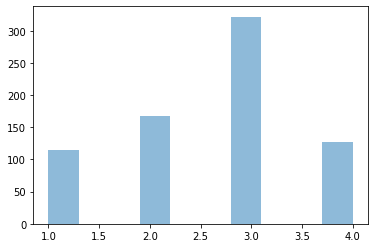

Printing top 4 Topics, with top 10 Words:
Topic #0:
digital currency world like without create trust one never amp
Topic #1:
currency digital xrp like bitcoin value market want invest wallet
Topic #2:
currency digital use new follow claim link code invitation worldwide
Topic #3:
digital currency bank central would china make think amp launch


In [ ]:
# Fungsi untuk mencari topic
lda_tf = LatentDirichletAllocation(n_components=n_topics, learning_method='online', random_state=0).fit(dtm_tf)

# Menampilkan Topik
vsm_topics = lda_tf.transform(dtm_tf); doc_topic =  [a.argmax()+1 for a in tqdm(vsm_topics)] # topic of docs
print('In total there are {0} major topics, distributed as follows'.format(len(set(doc_topic))))
plt.hist(np.array(doc_topic), alpha=0.5); plt.show()
print('Printing top {0} Topics, with top {1} Words:'.format(top_topics, top_words))
TS.print_Topics(lda_tf, tf_terms, top_topics, top_words)

In [ ]:
# Visualisasi Topic Secara Interaktif
pyLDAvis.sklearn.prepare(lda_tf, dtm_tf, count_vector) 

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
2      0.179377  0.043756       1        1  46.294310
1     -0.018401 -0.143266       2        1  21.713302
3     -0.038624  0.020189       3        1  18.452414
0     -0.122352  0.079322       4        1  13.539975, topic_info=          Term        Freq       Total Category  logprob  loglift
2588       use  146.000000  146.000000  Default  30.0000  30.0000
196       bank   72.000000   72.000000  Default  29.0000  29.0000
371    central   34.000000   34.000000  Default  28.0000  28.0000
996     follow   79.000000   79.000000  Default  27.0000  27.0000
414      claim   76.000000   76.000000  Default  26.0000  26.0000
...        ...         ...         ...      ...      ...      ...
1428      like   11.784919   46.877753   Topic4  -4.8667   0.6188
577   currency   33.506095  585.510970   Topic4  -3.8217  -0.8612
95         amp    9.148370   45.578804   Topic4  -5.1199   0.3937
1096     great    6.347978   18.631177   Topic4  -5.4853   0.9228
2688      well    5.199044   17.496367   Topic4  -5.6850   0.7860

[241 rows x 6 columns], token_table=      Topic      Freq      Term
term                           
37        2  0.900241  adoption
51        1  0.380869    agenda
51        4  0.533216    agenda
57        1  0.109461     agree
57        3  0.109461     agree
...     ...       ...       ...
2733      3  0.581093     would
2733      4  0.055342     would
2740      2  0.980394       xrp
2747      4  0.835705      year
2748      2  0.944100     years

[334 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[3, 2, 4, 1])